# Table of Contents

- [1. Gravimetric Modeling](#1-gravimetric-modeling)
  - [1.1 Importing Packages](#11-importing-packages)
  - [1.2 Gravimetric Validation](#12-gravimetric-validation)
    - [1.2.1 Forward Modeling](#121-forward-modeling)
    - [1.2.2 Creating Synthetic Data Parameters](#122-creating-synthetic-data-parameters)
    - [1.2.3 Comparison: Prisms vs Circle and Cylinder](#123-comparison-prisms-vs-circle-and-cylinder)
- [1.3 Synthetic Models from Article](#13-synthetic-models-from-article)
  - [1.3.1 Modeling Prism Parameters](#131-modeling-prism-parameters)
  - [1.3.2 Forward Modeling: 200 Vertical Prisms Mesh](#132-forward-modeling-200-vertical-prisms-mesh)
  - [1.3.3 Dip Angle Variation Cases](#133-dip-angle-variation-cases)
    - [1.3.3.1 45 Degrees](#1331-45-degrees)
    - [1.3.3.2 60 Degrees](#1332-60-degrees)
    - [1.3.3.3 75 Degrees](#1333-75-degrees)
    - [1.3.3.4 90 Degrees](#1334-90-degrees)
    - [1.3.3.5 105 Degrees](#1335-105-degrees)
    - [1.3.3.6 All Curves](#1336-all-curves)
  - [1.3.4 Horizontal Displacement of Contact](#134-horizontal-displacement-of-contact)
    - [1.3.4.1 Model 1 (0.1 km)](#1341-model-1-01-km)
    - [1.3.4.2 Model 2 (0.3 km)](#1342-model-2-03-km)
    - [1.3.4.3 Model 3 (0.5 km)](#1343-model-3-05-km)
    - [1.3.4.4 Model 4 (0.7 km)](#1344-model-4-07-km)
    - [1.3.4.5 Model 5 (0.9 km)](#1345-model-5-09-km)
    - [1.3.4.6 All Curves](#1346-all-curves)
  - [1.3.5 Vertical Displacement of Contact](#135-vertical-displacement-of-contact)
    - [1.3.5.1 Model 1 (0.1 km)](#1351-model-1-01-km)
    - [1.3.5.2 Model 2 (0.3 km)](#1352-model-2-03-km)
    - [1.3.5.3 Model 3 (0.5 km)](#1353-model-3-05-km)
    - [1.3.5.4 Model 4 (0.7 km)](#1354-model-4-07-km)
    - [1.3.5.5 Model 5 (0.9 km)](#1355-model-5-09-km)
    - [1.3.5.6 All Curves](#1356-all-curves)
  


# Gravimetric Modeling

### Importing Packages

In [48]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.patches as patches
import math
import cmath 
from decimal import Decimal
import sympy as sp 
from matplotlib.patches import Circle

import sys
np.set_printoptions(
                   edgeitems=10, linewidth=50)


### Gravimetric Validation

#### Foward Modeling

In [49]:
# Gz calculus
def gvertical(vecx,R,xq,z1,z2,t):
    gz = np.zeros(len(vecx), dtype=float)
    for i in range(len(gz)):   
            if z1==0:
                
                if xq==0 and vecx[i]==t:
                    gz[i] = (2*G*R)*(((vecx[i])/2)*math.log((z2**2+vecx[i]**2)/(vecx[i]**2))-z2*(math.atan(0)-math.atan((vecx[i]/z2))))
                    

                if xq==0 and vecx[i]!=t:
                    gz[i] = (2*G*R)*(((vecx[i])/2)*math.log((z2**2+(vecx[i])**2)/((vecx[i])**2))+((vecx[i]-t)/2)*math.log(((vecx[i]-t)**2)/(z2**2+((vecx[i]-t)**2)))-z2*(math.atan(((vecx[i]-t)/z2))-math.atan((vecx[i]/z2))))
  
                if xq!=0 and vecx[i]==xq:
                    gz[i] = (2*G*R)*(((-t)/2)*math.log((((-t)**2)/(z2**2+(-t)**2)))-z2*(math.atan(((-t)/z2))))

                
                if xq!=0 and vecx[i]!=xq:
                    
                    if vecx[i]-xq==t:
                        gz[i] = (2*G*R)*(((vecx[i]-xq)/2)*math.log((z2**2+(vecx[i]-xq)**2)/(z1**2+(vecx[i]-xq)**2))-z2*(math.atan(0)-math.atan(((vecx[i]-xq)/z2))))

                    
                    else:
                        gz[i] = (2*G*R)*(((vecx[i]-xq)/2)*math.log((z2**2+(vecx[i]-xq)**2)/((vecx[i]-xq)**2))+(((vecx[i]-xq)-t)/2)*math.log((((vecx[i]-xq)-t)**2)/(z2**2+((vecx[i]-xq)-t)**2))-z2*(math.atan((((vecx[i]-xq)-t)/z2))-math.atan(((vecx[i]-xq)/z2))))        

                    

            else:
                 gz[i] = (2*G*R)*(((vecx[i]-xq)/2)*math.log((z2**2+(vecx[i]-xq)**2)/(z1**2+(vecx[i]-xq)**2))+(((vecx[i]-xq)-t)/2)*math.log((z1**2+((vecx[i]-xq)-t)**2)/(z2**2+((vecx[i]-xq)-t)**2))-z2*(math.atan((((vecx[i]-xq)-t)/z2))-math.atan(((vecx[i]-xq)/z2)))+z1*(math.atan((((vecx[i]-xq)-t)/z1))-math.atan(((vecx[i]-xq)/z1))))        


    return gz

In [50]:
# Generate the bouguer anomaly curve
def gv_curve(densities, vecx, xq, z1, z2, t, num_prisms):
    final_curve = np.zeros(len(vecx), dtype=float)
    counter = 0  
    num_layers = len(densities)  # Quantity of layers
    
    for d in densities:
        for i, j in enumerate(d):
            counter += 1
            
            # Calculating which layer to use dynamically
            layer_index = min(counter // (num_prisms // num_layers), num_layers - 1)
            
            # Update the final curve with the vertical gravity calculation for the correct layer
            final_curve += gvertical(vecx, j, xq[i], z1[layer_index], z2[layer_index], t)
                
    return final_curve * (10**5)


#### Creating Syntetic Data parameters

In [51]:
# x parameter
vecx=np.arange(100,8000,200)

# x parameter for ploting
vecx_km=[]
for i in vecx:
    vecx_km.append(i/1000)

G= 6.672*(10**(-11 )) # km**3/s**2 * kg**2

# 1G= 10**(-4) kg/A * s**2  -ALREADY IN mGauss

z1=np.arange(0,1000,1000/20)
z2=np.arange(1000/20,1000+1000/20,1000/20) #meters
xq=np.arange(0,8000,200) #meters

t=200 #meters



#### Comparison Prisms with Circle and Cylinder

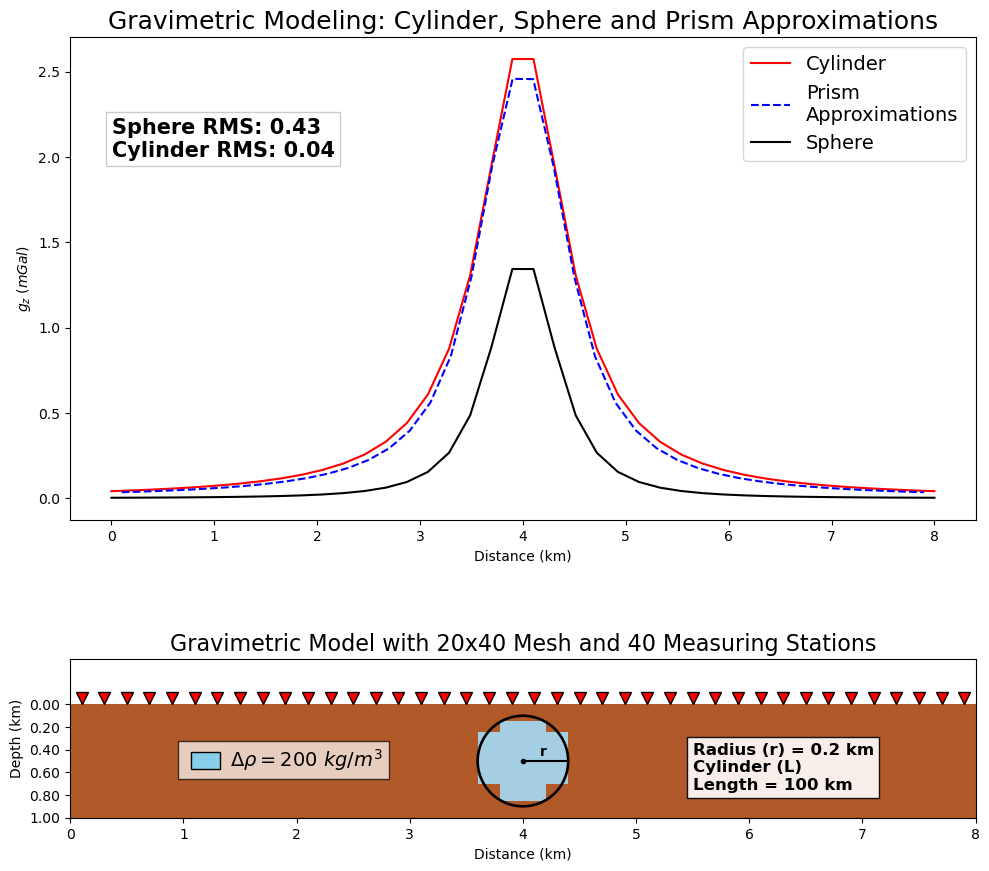

In [52]:
# Gravitational constant (m^3 kg^−1 s^−2)
G = 6.67430e-11

# Sphere parameters
R = 400.0             # Radius of the sphere (m)
delta_rho = 200       # Density contrast (kg/m³)
z = 500.0             # Depth to the center of the sphere (m)
L = 100000            # Length of the cylinder (m)

# Define x-axis values (station positions)
x_min = 0
x_max = 8000
n_points = 40         # Number of stations
x_values = np.linspace(x_min, x_max, n_points)

# Density mesh (20 rows x 40 columns)
densidades_malha = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]


density_mesh = [
    [0] * 40,
    [0] * 40,
    [0] * 40,
    [0] * 19 + [200, 200] + [0] * 19,
    [0] * 19 + [200, 200] + [0] * 19,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 19 + [200, 200] + [0] * 19,
    [0] * 19 + [200, 200] + [0] * 19,
    [0] * 19 + [200, 200] + [0] * 19,
    [0] * 40,
    [0] * 40,
    [0] * 40
]


# --- Gravimetric modeling ---

# Cylinder response
gz_cylinder_raw = ((4.19e-10 * delta_rho * (R**2)) / (z * (1 + ((x_values - 4000)**2) / z**2))) \
                  * (1 / (1 + (((x_values - 4000)**2 + z**2) / L**2))**0.5)
gz_cylinder = gz_cylinder_raw * 1e5  # Convert to mGal

# Sphere response
gz_sphere = ((2.79e-10 * delta_rho * (R**3) * z) / (((x_values - 4000)**2 + z**2)**1.5)) * 1e5  # mGal

# Prism response (you must define vecx, xq, z1, z2, t, and gv_curve)
gz_prisms = gv_curve(density_mesh, vecx, xq, z1, z2, t, 900)

# RMS errors
rms_cylinder = np.sqrt(np.mean((gz_cylinder - np.array(gz_prisms))**2))
rms_sphere = np.sqrt(np.mean((gz_sphere - np.array(gz_prisms))**2))

# --- Plotting ---
plt.figure(figsize=(10, 10))

# Plot 1: Gravimetric curves
plt.subplot(2, 1, 1)
plt.plot(x_values, gz_cylinder, color='red', label='Cylinder')
plt.plot(vecx, gz_prisms, color='blue', label='Prism\nApproximations', linestyle='--')
plt.plot(x_values, gz_sphere, color='black', label='Sphere')

plt.xlabel('Distance (km)')
plt.ylabel(r'$g_z$ $(mGal)$')
plt.title('Gravimetric Modeling: Cylinder, Sphere and Prism Approximations', fontsize=18)
plt.legend(loc='upper right', fontsize=14)

# Custom x-ticks
x_vals = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
x_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
plt.xticks(x_vals, x_labels)

# RMS text
plt.text(3, 2, f'Sphere RMS: {rms_sphere:.2f}\nCylinder RMS: {rms_cylinder:.2f}', 
         fontsize=15, color='black', fontweight='bold', 
         bbox=dict(facecolor='white', alpha=0.2, edgecolor='black'))

# Plot 2: 2D Model with density contrast
plt.subplot(2, 1, 2)
pastel_reversed = plt.get_cmap('Paired').reversed()
plt.imshow(density_mesh, extent=[0, 8, 1, 0], cmap=pastel_reversed, aspect=1/1)

# Stations (measurement positions)
vecyy = np.zeros_like(vecx_km) - 0.06
plt.plot(vecx_km, vecyy, "v", markersize=8, color='red', markeredgecolor='black')

# Draw sphere
circle1 = plt.Circle((4, 0.5), 0.4, edgecolor='black', facecolor='none', lw=1.9)
plt.gca().add_patch(circle1)

# Labels and limits
plt.xlim((0, 8))
plt.ylim((1.001, -0.4))
y_vals = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
y_labels = ['0.00', '0.20', '0.40', '0.60', '0.80', '1.00']
plt.yticks(y_vals, y_labels)

plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Gravimetric Model with 20x40 Mesh and 40 Measuring Stations', fontsize=16)

# Annotations
plt.text(5.5, 0.75, 'Radius (r) = 0.2 km\nCylinder (L)\nLength = 100 km',
         fontsize=12, color='black', fontweight='bold', 
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='black'))

# Arrow from sphere center to boundary
plt.plot([4, 4.4], [0.5, 0.5], marker='none', color='black')
plt.plot(4, 0.5, marker='o', color='black', markersize=3)
plt.text(4.15, 0.45, 'r', fontsize=10, color='black', fontweight='bold')

# Density annotation
plt.text(1, 0.55, r'       $\Delta\rho=200\ kg/m^3$', fontsize=14, 
         color='black', fontweight='bold', 
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

# Add blue rectangle
rectangle = plt.Rectangle((1.07, 0.42), 0.25, 0.15, facecolor='skyblue', 
                          edgecolor='black', linewidth=1, zorder=10)
plt.gca().add_patch(rectangle)

# Final layout
plt.tight_layout()
plt.show()


 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

 ### Syntetic Models from Article

A total of 15 synthetic gravimetric models were analyzed, organized into three groups of five, each addressing a specific aspect of the study. The first group focused on horizontal contact displacement models, evaluating displacement values of 0.1 km, 0.3 km, 0.5 km, 0.7 km, and 0.9 km. The second group investigated vertical displacement models, applying the same set of displacement values. Finally, the third group examined dip angular variation models, considering angles of 45°, 60°, 75°, 90°, and 105°.

#### Modeling Prism Parameters

In [4]:
# --------------------------------------------
# SYNTHETIC DATA (FIELD SIMULATION)
# --------------------------------------------

# Measurement station positions (in km)
vecx = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95,
        1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95]

# Subset of positions for plotting
vecx_plotagem = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05]

# Gravitational constant (in km³/kg/s²)
G = 6.672 * (10**(-20))  # already adjusted for use in mGal

# Layer depths: top and base of each vertical prism (in km)
z1 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
z2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Horizontal positions of the prisms (in km)
xq = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
      1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]

# Prism width (in km)
t = 0.1

# Modeling parameters
porcentagem_erro = 0         # error percentage (used for synthetic noise)
largura_total = 1            # total model width (in km)
profundidade_total = 1       # total model depth (in km)

# Note: all arctangent values are expected in radians


### Foward Modeling: 200 Vertical Prisms Mesh

In [5]:
# Gz calculus
def gvertical(vecx,R,xq,z1,z2,t):
    gz = np.zeros(len(vecx), dtype=float)
    for i in range(len(gz)):   
            if z1==0:
                
                if xq==0 and vecx[i]==t:
                    gz[i] = (2*G*R)*(((vecx[i])/2)*math.log((z2**2+vecx[i]**2)/(vecx[i]**2))-z2*(math.atan(0)-math.atan((vecx[i]/z2))))
                    

                if xq==0 and vecx[i]!=t:
                    gz[i] = (2*G*R)*(((vecx[i])/2)*math.log((z2**2+(vecx[i])**2)/((vecx[i])**2))+((vecx[i]-t)/2)*math.log(((vecx[i]-t)**2)/(z2**2+((vecx[i]-t)**2)))-z2*(math.atan(((vecx[i]-t)/z2))-math.atan((vecx[i]/z2))))
  
                if xq!=0 and vecx[i]==xq:
                    gz[i] = (2*G*R)*(((-t)/2)*math.log((((-t)**2)/(z2**2+(-t)**2)))-z2*(math.atan(((-t)/z2))))

                
                if xq!=0 and vecx[i]!=xq:
                    
                    if vecx[i]-xq==t:
                        gz[i] = (2*G*R)*(((vecx[i]-xq)/2)*math.log((z2**2+(vecx[i]-xq)**2)/(z1**2+(vecx[i]-xq)**2))-z2*(math.atan(0)-math.atan(((vecx[i]-xq)/z2))))

                    
                    else:
                        gz[i] = (2*G*R)*(((vecx[i]-xq)/2)*math.log((z2**2+(vecx[i]-xq)**2)/((vecx[i]-xq)**2))+(((vecx[i]-xq)-t)/2)*math.log((((vecx[i]-xq)-t)**2)/(z2**2+((vecx[i]-xq)-t)**2))-z2*(math.atan((((vecx[i]-xq)-t)/z2))-math.atan(((vecx[i]-xq)/z2))))        

                    

            else:
                 gz[i] = (2*G*R)*(((vecx[i]-xq)/2)*math.log((z2**2+(vecx[i]-xq)**2)/(z1**2+(vecx[i]-xq)**2))+(((vecx[i]-xq)-t)/2)*math.log((z1**2+((vecx[i]-xq)-t)**2)/(z2**2+((vecx[i]-xq)-t)**2))-z2*(math.atan((((vecx[i]-xq)-t)/z2))-math.atan(((vecx[i]-xq)/z2)))+z1*(math.atan((((vecx[i]-xq)-t)/z1))-math.atan(((vecx[i]-xq)/z1))))        


    return gz

In [6]:
# Generate the Bouguer anomaly curve based on a grid of vertical prisms
def curva_gv(densidades, vecx, xq, z1, z2, t):
    curva_final = np.zeros(len(vecx), dtype=float)  # Initialize final gravity curve
    contador = 0  # Counter to track the number of prisms (200 total)

    for d in densidades:          # Loop over each row of the density grid
        for i, j in enumerate(d): # Loop over each prism in the row
            contador += 1         # Increment prism counter

            # For each depth layer (z1 to z2), add the vertical gravity effect
            if contador <= 20:
                curva_final += gvertical(vecx, j, xq[i], z1[0], z2[0], t)

            elif contador <= 40:
                curva_final += gvertical(vecx, j, xq[i], z1[1], z2[1], t)

            elif contador <= 60:
                curva_final += gvertical(vecx, j, xq[i], z1[2], z2[2], t)

            elif contador <= 80:
                curva_final += gvertical(vecx, j, xq[i], z1[3], z2[3], t)

            elif contador <= 100:
                curva_final += gvertical(vecx, j, xq[i], z1[4], z2[4], t)

            elif contador <= 120:
                curva_final += gvertical(vecx, j, xq[i], z1[5], z2[5], t)

            elif contador <= 140:
                curva_final += gvertical(vecx, j, xq[i], z1[6], z2[6], t)

            elif contador <= 160:
                curva_final += gvertical(vecx, j, xq[i], z1[7], z2[7], t)

            elif contador <= 180:
                curva_final += gvertical(vecx, j, xq[i], z1[8], z2[8], t)

            elif contador <= 200:
                curva_final += gvertical(vecx, j, xq[i], z1[9], z2[9], t)

    # Return the final Bouguer anomaly (converted to mGal)
    return curva_final / (10**(-7))

####  Dip Angle Variation Cases

#### 45 Degrees

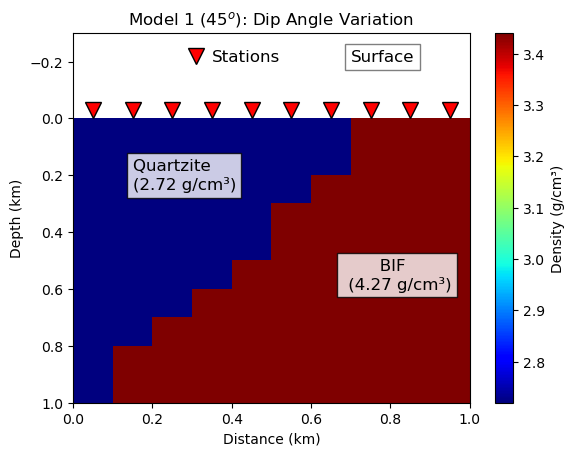

In [8]:
# Define a 10x20 grid of density values in g/cm³ (converted later to kg/m³)
densidades = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0]
])

# Reference density model in g/cm³ for plotting (10x10 grid)
densidades_iniciais1  = np.array([
    [2.72,2.72,2.72,2.72,2.72, 2.72,2.72,3.44, 3.44, 3.44],
    [2.72,2.72,2.72,2.72,2.72, 2.72,2.72,3.44, 3.44, 3.44],
    [2.72,2.72,2.72,2.72,2.72, 2.72,3.44, 3.44, 3.44, 3.44],
    [2.72,2.72,2.72,2.72,2.72, 3.44,3.44, 3.44, 3.44, 3.44],
    [2.72,2.72,2.72,2.72,2.72, 3.44,3.44, 3.44, 3.44, 3.44],
    [2.72,2.72,2.72,2.72,3.44, 3.44,3.44, 3.44, 3.44, 3.44],
    [2.72,2.72,2.72,3.44,3.44, 3.44,3.44, 3.44, 3.44, 3.44],
    [2.72,2.72,3.44,3.44,3.44, 3.44,3.44, 3.44, 3.44, 3.44],
    [2.72,3.44,3.44,3.44,3.44, 3.44,3.44, 3.44, 3.44, 3.44],
    [2.72,3.44,3.44,3.44,3.44, 3.44,3.44, 3.44, 3.44, 3.44]
])

# Convert densities from g/cm³ to kg/m³ by multiplying by 1e12
densidades = densidades * (10**12)

# Plotting the initial 2D density model
plt.imshow(densidades_iniciais1, extent=[0, 1, 1, 0], aspect='auto', cmap='jet')
plt.ylim((1, -0.3))  # Invert Y-axis for depth

# Plot measurement station markers (red inverted triangles)
vecxx = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
vecyy = np.zeros_like(vecxx) - 0.03
plt.plot(vecxx, vecyy, "v", markersize=12, color='red', markeredgecolor='black')

# Add annotation labels
plt.text(0.7, -0.2, 'Surface', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.35, -0.2, 'Stations', fontsize=12)
plt.plot(0.31, -0.22, "v", markersize=11, color='red', markeredgecolor='black')
plt.text(0.15, 0.25, 'Quartzite \n(2.72 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.68, 0.60, '       BIF \n (4.27 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Colorbar and axis labels
plt.colorbar(label='Density (g/cm³)')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Model 1 (45$^o$): Dip Angle Variation')

# Save figure
# plt.savefig("DAV-1.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)
plt.show()


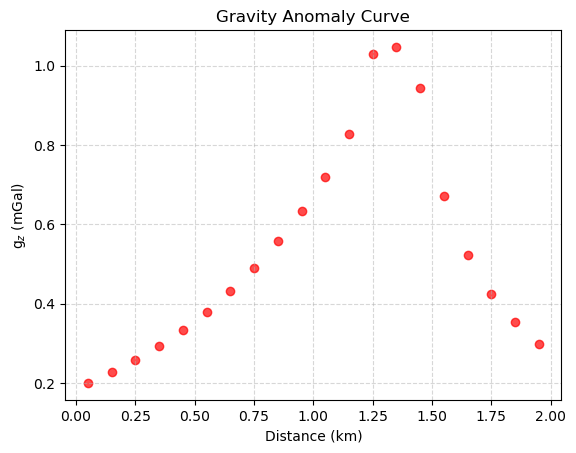

In [9]:
# Generate the gravity anomaly curve using the defined density model
curva_final1 = curva_gv(densidades, vecx, xq, z1, z2, t)
curva_final1  # This will print the array with the calculated anomaly values

# === Plot the Anomaly Curve ===

# Create a scatter plot of the computed gravity anomaly values
plt.scatter(vecx, curva_final1, color='red', marker='o', alpha=0.7)

# Add axis labels and plot title
plt.xlabel('Distance (km)')
plt.ylabel('g$_z$ (mGal)')
plt.title('Gravity Anomaly Curve')

# Add a dashed grid in the background for readability
plt.grid(True, linestyle='--', alpha=0.5)

# Optional axis limits (uncomment if needed)
# plt.xlim(0.5, 1.2)
# plt.ylim(-0.5, 1.0)

# Optional: add text with noise level
# plt.text(-10, 14, 'Noise: 6%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Optional: show legend
# plt.legend(loc='upper center')

# Display the plot
plt.show()


#### 60 Degrees

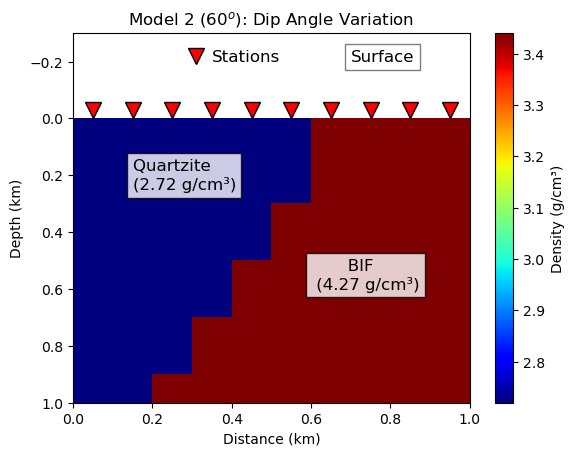

In [10]:
# Define the density contrast model (in 10x20 format) for BIF structure
densidades = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0]
])

# Define background model (10x10) with geological units (quartzite and BIF)
densidades_iniciais1 = np.array([
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44]
])

# Apply density contrast in kg/m³
densidades = densidades * (10**12)

# === PLOT THE 2D MODEL ===
plt.imshow(densidades_iniciais1, extent=[0, 1, 1, 0], aspect='auto', cmap='jet')
plt.ylim((1, -0.3))  # Invert Y axis to show surface on top

# Add markers for stations as red downward triangles
vecxx = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
vecyy = np.zeros_like(vecxx) - 0.03
plt.plot(vecxx, vecyy, "v", markersize=12, color='red', markeredgecolor='black')

# Annotate the figure with labels
plt.text(0.7, -0.2, 'Surface', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.35, -0.2, 'Stations', fontsize=12)
plt.plot(0.31, -0.22, "v", markersize=11, color='red', markeredgecolor='black')
plt.text(0.15, 0.25, 'Quartzite \n(2.72 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.6, 0.60, '       BIF \n (4.27 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Optional labels for other rock types (commented out)
# plt.text(0.6, 0.80, 'Limestone \n (2.55 g/cm³)', ...)
# plt.text(0.10, 0.96, 'Metamorphic \n (2.74 g/cm³)', ...)

# Add colorbar, labels and title
plt.colorbar(label='Density (g/cm³)')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Model 2 (60$^o$): Dip Angle Variation')

# Save figure and display
# plt.savefig("DAV-2.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)
plt.show()


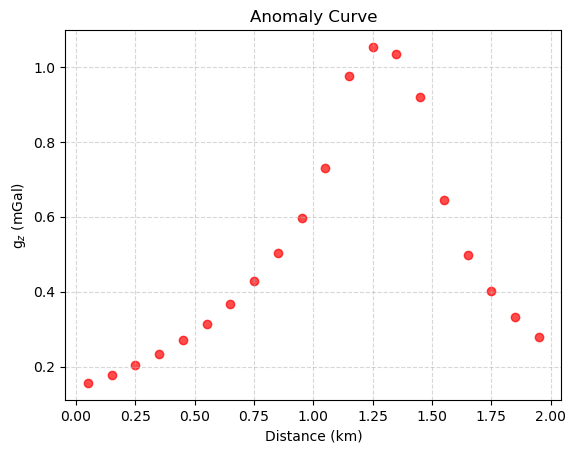

In [11]:
# Compute the gravity anomaly curve for the defined model
curva_final2 = curva_gv(densidades, vecx, xq, z1, z2, t)
curva_final2

# === PLOT THE GRAVITY ANOMALY CURVE ===

# Plot the synthetic gravity anomaly as a scatter plot
plt.scatter(vecx, curva_final2, color='red', marker='o', alpha=0.7)

# Set axis labels and plot title
plt.xlabel('Distance (km)')
plt.ylabel('g$_z$ (mGal)')
plt.title('Anomaly Curve')

# Add background grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: Define custom axis limits
# plt.xlim(-0.25, 1.2)   # X-axis range
# plt.ylim(-0.5, 1.0)    # Y-axis range

# Optional: Add annotation or legend
# plt.text(-10, 14, 'Noise: 6%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
# plt.legend(loc='upper center')

# Display the plot
plt.show()


#### 75 Degrees

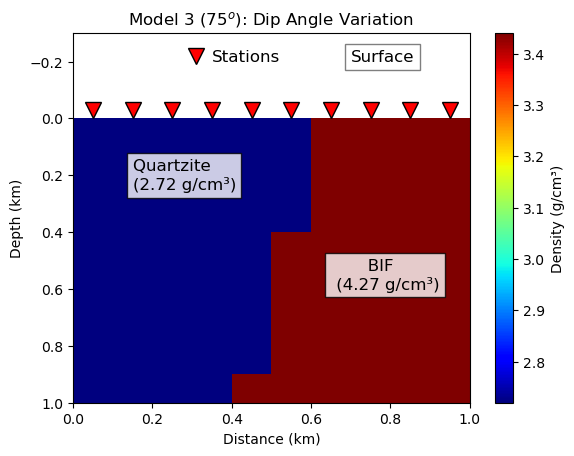

In [29]:
# === DENSITY MODEL (10x20 grid) ===

densidades = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0]
])

densidades_iniciais1 = np.array([
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44]
])

# Convert relative contrast values to kg/m³ by multiplying with 1e12
densidades = densidades * (10**12)

# === PLOT THE DENSITY MODEL ===

plt.imshow(densidades_iniciais1, extent=[0, 1, 1, 0], aspect='auto', cmap='jet')

# Set vertical axis to show depth increasing downward
plt.ylim((1, -0.3))

# Add inverted triangle markers for station locations
vecxx = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
vecyy = np.zeros_like(vecxx) - 0.03
plt.plot(vecxx, vecyy, "v", markersize=12, color='red', markeredgecolor='black')

# Add annotations for surface, stations, and geological units
plt.text(0.7, -0.2, 'Surface', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.35, -0.2, 'Stations', fontsize=12)
plt.plot(0.31, -0.22, "v", markersize=11, color='red', markeredgecolor='black')
plt.text(0.15, 0.25, 'Quartzite \n(2.72 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.65, 0.60, '       BIF \n (4.27 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Optional: other lithologies
# plt.text(...)

# Add color bar and axis labels
plt.colorbar(label='Density (g/cm³)')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Model 3 (75$^o$): Dip Angle Variation')

# Save and show the figure
# plt.savefig("DAV-3.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)
plt.show()


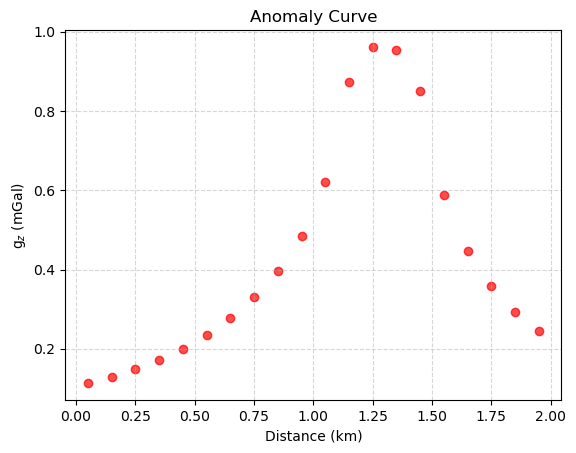

In [13]:
# Compute the Bouguer anomaly curve for Model 3
curva_final3 = curva_gv(densidades, vecx, xq, z1, z2, t)
curva_final3

# PLOT THE GRAPH

# Create a scatter plot for the calculated gravity anomaly
# plt.scatter(vecx, verificar, color='dodgerblue', marker='o', alpha=0.7)
plt.scatter(vecx, curva_final3, color='red', marker='o', alpha=0.7)

# Add axis labels and a title to the plot
plt.xlabel('Distance (km)')
plt.ylabel('g$_z$ (mGal)')
plt.title('Anomaly Curve')

# Add a grid to the background
plt.grid(True, linestyle='--', alpha=0.5)

# Set x and y axis limits if needed
# plt.xlim(-0.25, 1.2)  # X-axis range
# plt.ylim(-0.5, 1)     # Y-axis range

# Add a text box (optional)
# plt.text(-10, 14, 'Noise: 6%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show legend (optional)
# plt.legend(loc='upper center')

# Display the plot
plt.show()


#### 90 Degrees

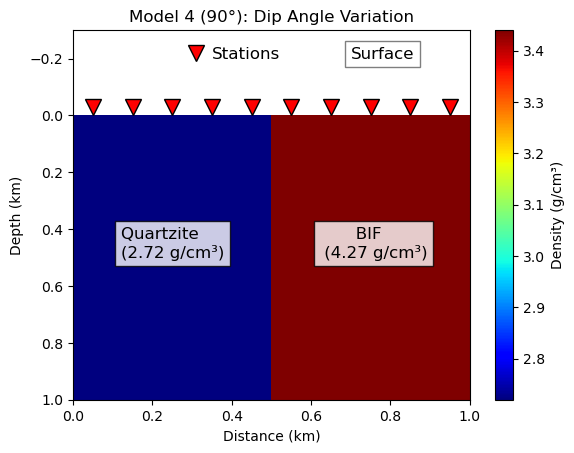

In [14]:
# 10x10 density model for 90° dip

densidades = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.64, 0.64, 0.64, 0.64, 0.64, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.64, 0.64, 0.64, 0.64, 0.64, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.64, 0.64, 0.64, 0.64, 0.64, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.64, 0.64, 0.64, 0.64, 0.64, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.64, 0.64, 0.64, 0.64, 0.64, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.64, 0.64, 0.64, 0.64, 0.64, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.64, 0.64, 0.64, 0.64, 0.64, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.64, 0.64, 0.64, 0.64, 0.64, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.64, 0.64, 0.64, 0.64, 0.64, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.64, 0.64, 0.64, 0.64, 0.64, 0, 0, 0, 0, 0],
])

densidades_iniciais1 = np.array([
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
])

# Rock types (for reference):
# Clay - 2.21 g/cm³
# Limestone - 2.55 g/cm³
# Sandstone - 2.00 g/cm³
# Conglomerate - 2.50 g/cm³
# Metamorphic - 2.74 g/cm³

# Convert density contrast to SI units (kg/m³)
densidades = densidades * 1e12

##### PLOT MODEL #####

# Plot the 2D geological model with different densities
plt.imshow(densidades_iniciais1, extent=[0, 1, 1, 0], aspect='auto', cmap='jet')

# Invert Y-axis and adjust scale
plt.ylim((1, -0.3))

# Add markers for stations (inverted triangles)
vecxx = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])
vecyy = np.zeros_like(vecxx) - 0.03
plt.plot(vecxx, vecyy, "v", markersize=12, color='red', markeredgecolor='black')

# Add labels
plt.text(0.7, -0.2, 'Surface', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.35, -0.2, 'Stations', fontsize=12)
plt.plot(0.31, -0.22, "v", markersize=11, color='red', markeredgecolor='black')
plt.text(0.12, 0.5, 'Quartzite \n(2.72 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.62, 0.50, '       BIF \n (4.27 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Add colorbar and axes labels
plt.colorbar(label='Density (g/cm³)')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Model 4 (90°): Dip Angle Variation')

# Save figure
# plt.savefig("DAV-4.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)

# Show the plot
plt.show()


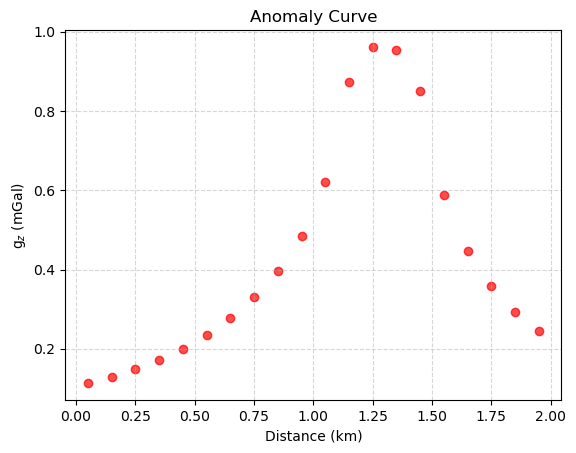

In [15]:
# Calculate the synthetic gravity anomaly curve
curva_final4 = curva_gv(densidades, vecx, xq, z1, z2, t)
curva_final4

# PLOT THE ANOMALY CURVE

# Create a scatter plot of the calculated data
# plt.scatter(vecx, verificar, color='dodgerblue', marker='o', alpha=0.7)
plt.scatter(vecx, curva_final3, color='red', marker='o', alpha=0.7)

# Add axis labels and plot title
plt.xlabel('Distance (km)')
plt.ylabel('g$_z$ (mGal)')
plt.title('Anomaly Curve')

# Add gridlines to the plot
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: Set custom axis limits
# plt.xlim(-0.25, 1.2)  # x-axis range
# plt.ylim(-0.5, 1)     # y-axis range

# Optional: Add noise level annotation
# plt.text(-10, 14, 'Noise: 6%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Optional: Add legend
# plt.legend(loc='upper center')

# Show the plot
plt.show()


#### 105 Degrees

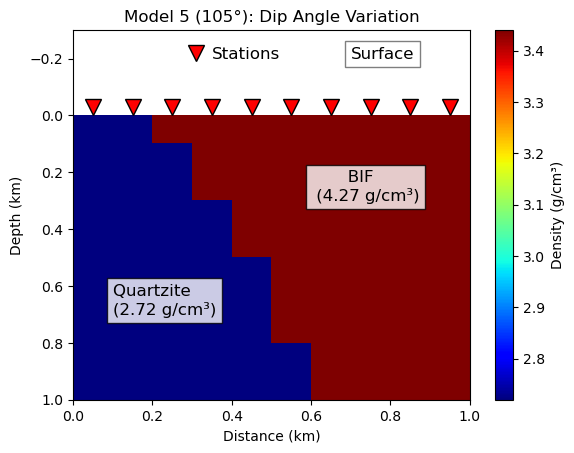

In [30]:
# 10x10 Density Grid

densidades = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0]
])

# Initial density model (in g/cm³)
densidades_iniciais1 = np.array([
    [2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44]
])

# Density conversion to kg/m³ (if needed for modeling)
densidades = densidades * 1e12

# PLOTTING THE MODEL

# Display the 2D density distribution
plt.imshow(densidades_iniciais1, extent=[0, 1, 1, 0], aspect='auto', cmap='jet')

# Adjust vertical scale
plt.ylim((1, -0.3))

# Plot station markers (red inverted triangles)
vecxx = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])
vecyy = np.zeros_like(vecxx) - 0.03
plt.plot(vecxx, vecyy, "v", markersize=12, color='red', markeredgecolor='black')

# Add labels and annotations
plt.text(0.7, -0.2, 'Surface', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.35, -0.2, 'Stations', fontsize=12)
plt.plot(0.31, -0.22, "v", markersize=11, color='red', markeredgecolor='black')
plt.text(0.1, 0.7, 'Quartzite \n(2.72 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.6, 0.30, '       BIF \n (4.27 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Add colorbar and axis labels
plt.colorbar(label='Density (g/cm³)')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Model 5 (105°): Dip Angle Variation')

# Save the figure
# plt.savefig("DAV-5.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)

# Show the plot
plt.show()


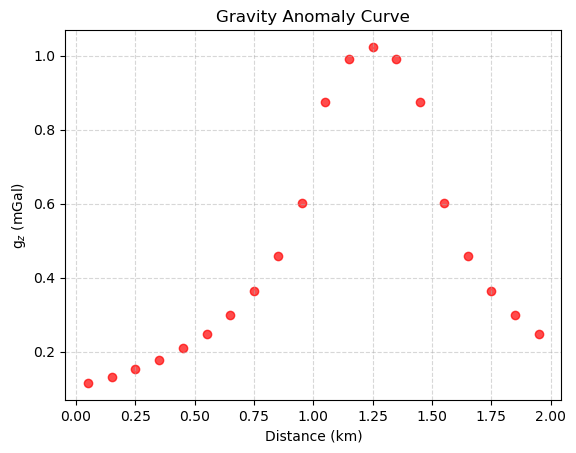

In [17]:
curva_final5 = curva_gv(densidades, vecx, xq, z1, z2, t)
curva_final5

# PLOTTING THE GRAVITY ANOMALY CURVE

# Create a scatter plot for the calculated anomaly values
# plt.scatter(vecx, verificar,  color='dodgerblue', marker='o', alpha=0.7)
plt.scatter(vecx, curva_final4, color='red', marker='o', alpha=0.7)

# Add axis labels and a title to the graph
plt.xlabel('Distance (km)')
plt.ylabel('g$_z$ (mGal)')
plt.title('Gravity Anomaly Curve')

# Add a background grid
plt.grid(True, linestyle='--', alpha=0.5)

# Set the desired intervals for the x and y axes (optional)
# plt.xlim(-0.25, 1.2)  # X-axis range
# plt.ylim(-0.5, 1)     # Y-axis range

# Optional noise annotation
# plt.text(-10, 14, 'Noise: 6%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show legend (if needed)
# plt.legend(loc='upper center')

# Display the plot
plt.show()


#### All curves

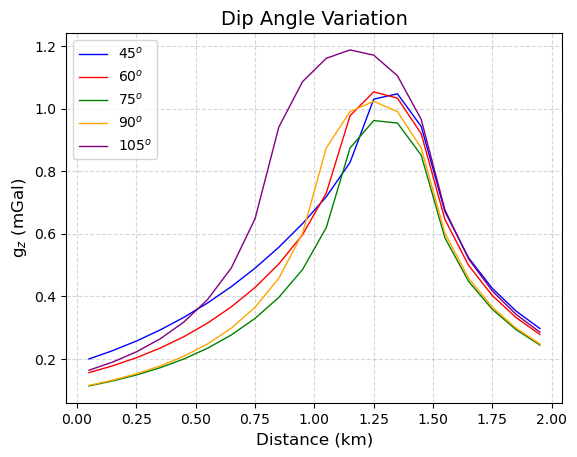

<Figure size 1000x600 with 0 Axes>

In [19]:
# Plotting the gravity anomaly curves for different dip angles
plt.plot(vecx, curva_final1, color='blue', linewidth=1, label='45$^o$')
plt.plot(vecx, curva_final2, color='red', linewidth=1, label='60$^o$')
plt.plot(vecx, curva_final3, color='green', linewidth=1, label='75$^o$')
plt.plot(vecx, curva_final4, color='orange', linewidth=1, label='90$^o$')
plt.plot(vecx, curva_final5, color='purple', linewidth=1, label='105$^o$')

# Add axis labels and title to the plot
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('g$_z$ (mGal)', fontsize=12)
plt.title('Dip Angle Variation', fontsize=14)

# Add grid lines to the background
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend with custom position and font size
plt.legend(loc='upper left', fontsize=10)

# Set font sizes for axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Save the figure (optional)
# plt.savefig("Dip_Angle_Variation.png", facecolor='w', bbox_inches="tight", transparent=True, dpi=300)

# Set the figure size
plt.figure(figsize=(10, 6))

# Adjust layout (optional)
# plt.tight_layout()

# Show the plot
plt.show()


#### Horizontal Displacement of Contact

#### Model 1 (0.1 km)

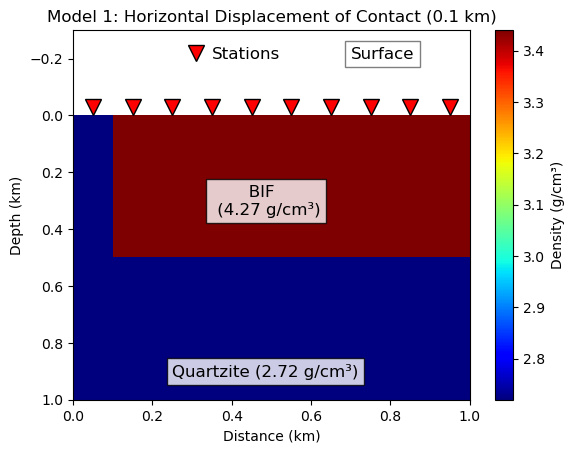

In [21]:
# 10x10 density matrix

densidades  = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
])

# Initial density model
densidades_iniciais1 = np.array([
       [2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
       [2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
       [2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
       [2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
       [2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
       [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
       [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
       [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
       [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
       [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72]
])

# Convert to kg/m³ (from g/cm³) if needed for modeling
densidades = densidades * (10)**12

##### PLOTTING THE MODEL #####

# Plot the 2D model of density distribution
plt.imshow(densidades_iniciais1, extent=[0, 1, 1, 0], aspect='auto', cmap='jet')
plt.ylim((1, -0.3))

# Add station markers as red inverted triangles
vecxx = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
vecyy = np.zeros_like(vecxx) - 0.03
plt.plot(vecxx, vecyy, "v", markersize=12, color='red', markeredgecolor='black')

# Add text labels
plt.text(0.7, -0.2, 'Surface', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.35, -0.2, 'Stations', fontsize=12)
plt.plot(0.31, -0.22, "v", markersize=11, color='red', markeredgecolor='black')
plt.text(0.25, 0.92, 'Quartzite (2.72 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.35, 0.35, '       BIF \n (4.27 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Add colorbar and axis labels
plt.colorbar(label='Density (g/cm³)')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Model 1: Horizontal Displacement of Contact (0.1 km)')

# Save the figure
# plt.savefig("HDC-1.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)

# Display the plot
plt.show()


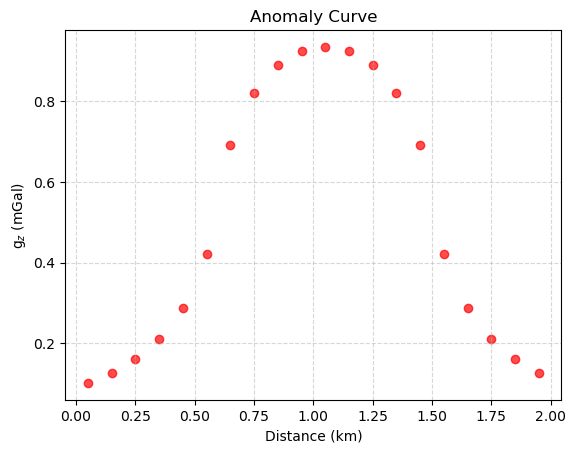

In [22]:
curva_final6 = curva_gv(densidades, vecx, xq, z1, z2, t)
curva_final6

# PLOT THE GRAPH

# Create a scatter plot for the calculated data
# plt.scatter(vecx, verificar,  color='dodgerblue', marker='o', alpha=0.7)
plt.scatter(vecx, curva_final6, color='red', marker='o', alpha=0.7)

# Add axis labels and a title
plt.xlabel('Distance (km)')
plt.ylabel('g$_z$ (mGal)')
plt.title('Anomaly Curve')

# Add a grid to the background
plt.grid(True, linestyle='--', alpha=0.5)

# Set desired axis limits (optional)
# plt.xlim(-0.25, 1.2)  # X-axis range
# plt.ylim(-0.5, 1)     # Y-axis range

# Optional noise information
# plt.text(-10, 14, 'Noise: 6%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Display legend (if needed)
# plt.legend(loc='upper center')

# Display the plot
plt.show()


#### Model 2 (0.3 km)

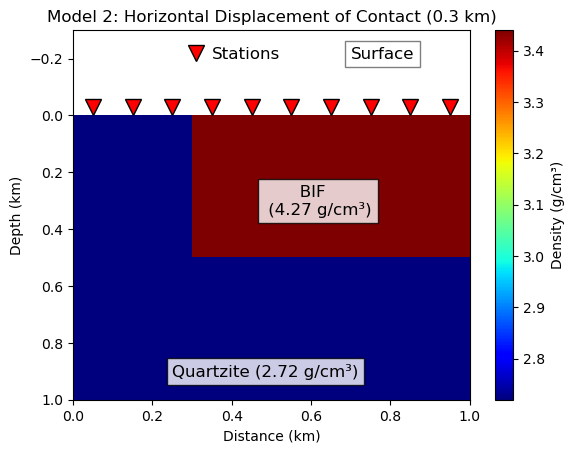

In [24]:
# 10x10 

densidades = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
])

densidades_iniciais1 = np.array([
    [2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72]
])

# Clay - 2.21 g/cm³
# Limestone - 2.55 g/cm³
# Sandstone - 2.00 g/cm³
# Conglomerate - 2.50 g/cm³
# Metamorphic - 2.74 g/cm³

densidades = densidades * (10**12)

##### PLOTTING THE MODEL

# Reverse the Pastel1 color map (optional)
# pastel_reversed = plt.get_cmap('Pastel1').reversed()

# Plot the 2D model with different density layers
plt.imshow(densidades_iniciais1, extent=[0, 1, 1, 0], aspect='auto', cmap='jet')
# , cmap=pastel_reversed

# Adjust Y-axis limits and add annotation
plt.ylim((1, -0.3))

# Add inverted triangle markers for station positions
vecxx = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])
vecyy = np.zeros_like(vecxx) - 0.03
plt.plot(vecxx, vecyy, "v", markersize=12, color='red', markeredgecolor='black')

plt.text(0.7, -0.2, 'Surface', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.35, -0.2, 'Stations', fontsize=12)
plt.plot(0.31, -0.22, "v", markersize=11, color='red', markeredgecolor='black')
plt.text(0.25, 0.92, 'Quartzite (2.72 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.48, 0.35, '       BIF \n (4.27 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.colorbar(label='Density (g/cm³)')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Model 2: Horizontal Displacement of Contact (0.3 km)')

# plt.savefig("HDC-2.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)

plt.show()


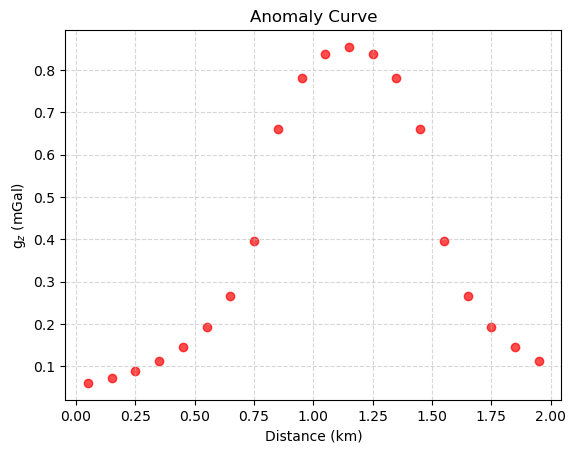

In [26]:
curva_final7 = curva_gv(densidades, vecx, xq, z1, z2, t)
curva_final7

# PLOT THE GRAPH

# Create a scatter plot for the computed data
# plt.scatter(vecx, verificar,  color='dodgerblue', marker='o', alpha=0.7)
plt.scatter(vecx, curva_final7, color='red', marker='o', alpha=0.7)

# Add labels to axes and a title to the plot
plt.xlabel('Distance (km)')
plt.ylabel('g$_z$ (mGal)')
plt.title('Anomaly Curve')
# plt.ylim(0, 9.7)

# Add a background grid to the plot
plt.grid(True, linestyle='--', alpha=0.5)

# Define desired axis ranges (optional)
# plt.xlim(-0.25, 1.2)  # x-axis range
# plt.ylim(-0.5, 1)     # y-axis range

# plt.text(-10, 14, 'Noise: 6%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show a legend (optional)
# plt.legend(loc='upper center')

# Display the plot
plt.show()


#### Model 3 (0.5 km)

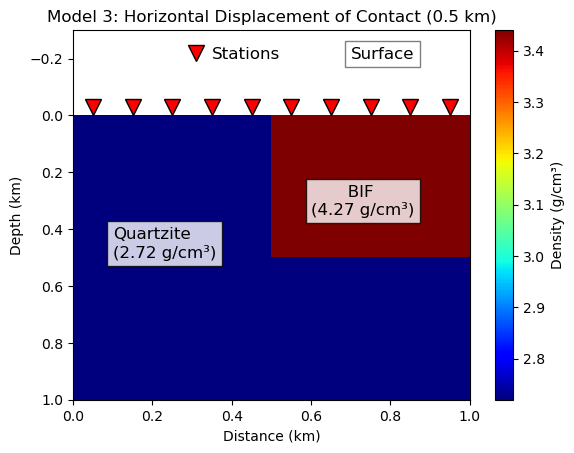

In [28]:
densidades = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
])

# 10x10 

densidades_iniciais1  = np.array([
       [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
       [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
       [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
       [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
       [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
       [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
       [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
       [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
       [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
       [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72]
])

# Clay - 2.21 g/cm³
# Limestone - 2.55 g/cm³
# Sandstone - 2.00 g/cm³
# Conglomerate - 2.50 g/cm³
# Metamorphic - 2.74 g/cm³

densidades = densidades * (10**12)

##### PLOTTING THE MODEL

# Plot the 2D model with different density layers
plt.imshow(densidades_iniciais1, extent=[0, 1, 1, 0], aspect='auto', cmap='jet')

# Set Y-axis limits and add label
plt.ylim((1, -0.3))

# Add inverted triangle markers
vecxx = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])
vecyy = np.zeros_like(vecxx) - 0.03
plt.plot(vecxx, vecyy, "v", markersize=12, color='red', markeredgecolor='black')

# Annotate surface and stations
plt.text(0.7, -0.2, 'Surface', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.35, -0.2, 'Stations', fontsize=12)
plt.plot(0.31, -0.22, "v", markersize=11, color='red', markeredgecolor='black')

# Annotate geological units
plt.text(0.1, 0.5, 'Quartzite\n(2.72 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.6, 0.35, '       BIF\n(4.27 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Add colorbar and labels
plt.colorbar(label='Density (g/cm³)')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Model 3: Horizontal Displacement of Contact (0.5 km)')

# Save and display
# plt.savefig("HDC-3.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)
plt.show()


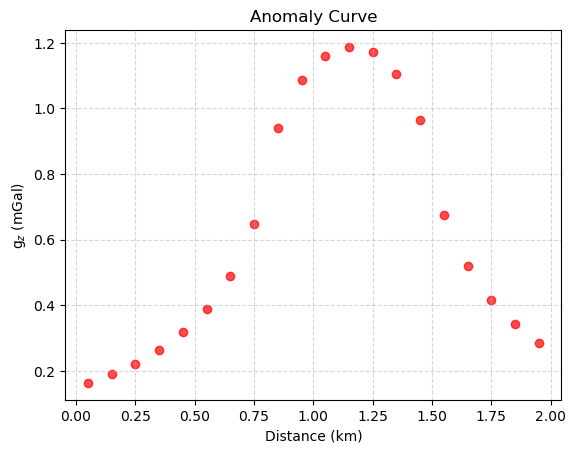

In [31]:
curva_final8 = curva_gv(densidades, vecx, xq, z1, z2, t)
curva_final8

# PLOT THE GRAPH

# Create a scatter plot for the calculated data
# plt.scatter(vecx, verificar, color='dodgerblue', marker='o', alpha=0.7)
plt.scatter(vecx, curva_final8, color='red', marker='o', alpha=0.7)

# Add axis labels and a title to the graph
plt.xlabel('Distance (km)')
plt.ylabel('g$_z$ (mGal)')
plt.title('Anomaly Curve')

# Add a background grid to the plot
plt.grid(True, linestyle='--', alpha=0.5)

# Set the desired intervals for the x and y axes
# plt.xlim(-0.25, 1.2)  # X-axis range
# plt.ylim(-0.5, 1)     # Y-axis range

# Optionally add annotation (commented out)
# plt.text(-10, 14, 'Noise: 6%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Optionally show legend (commented out)
# plt.legend(loc='upper center')

# Display the graph
plt.show()


#### Model 4 (0.7 km)

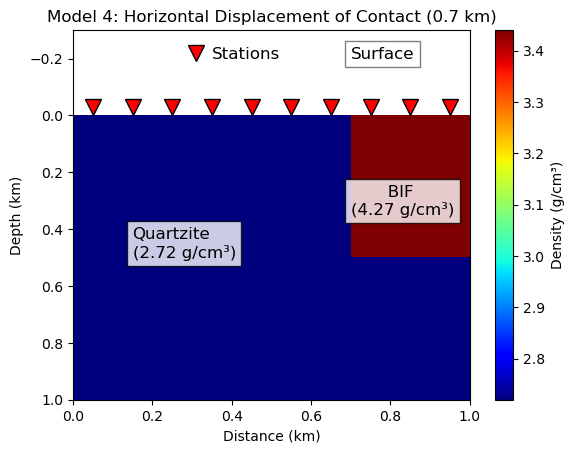

In [32]:
# 10x10 density model
densidades = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
])

densidades_iniciais1 = np.array([
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72]
])

# Reference values for materials:
# Clay: 2.21 g/cm³
# Limestone: 2.55 g/cm³
# Sandstone: 2.00 g/cm³
# Conglomerate: 2.50 g/cm³
# Metamorphic: 2.74 g/cm³

# Convert anomaly-producing densities to SI units
densidades = densidades * (10**12)

# PLOTTING THE MODEL

# Plot the 2D density model with color representation
plt.imshow(densidades_iniciais1, extent=[0, 1, 1, 0], aspect='auto', cmap='jet')
plt.ylim((1, -0.3))  # Reverse Y-axis for depth

# Add inverted triangle markers to represent surface stations
vecxx = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])
vecyy = np.zeros_like(vecxx) - 0.03
plt.plot(vecxx, vecyy, "v", markersize=12, color='red', markeredgecolor='black')

# Add text labels to the plot
plt.text(0.7, -0.2, 'Surface', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.35, -0.2, 'Stations', fontsize=12)
plt.plot(0.31, -0.22, "v", markersize=11, color='red', markeredgecolor='black')
plt.text(0.15, 0.5, 'Quartzite\n(2.72 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.7, 0.35, '       BIF\n(4.27 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Add colorbar and axis labels
plt.colorbar(label='Density (g/cm³)')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Model 4: Horizontal Displacement of Contact (0.7 km)')

# Save and show the figure
# plt.savefig("HDC-4.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)
plt.show()


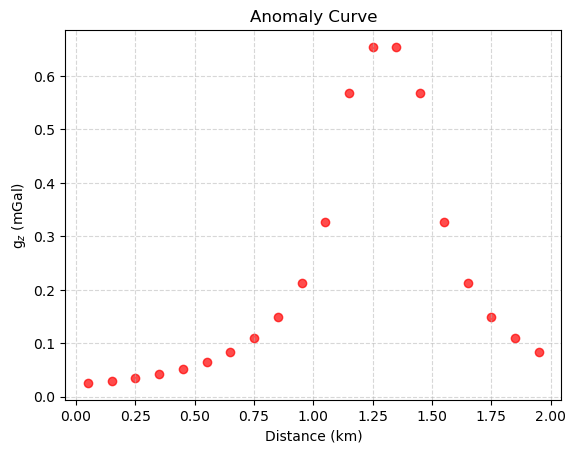

In [33]:
curva_final9 = curva_gv(densidades, vecx, xq, z1, z2, t)
curva_final9

# PLOT THE GRAPH

# Create a scatter plot for the modeled data
# plt.scatter(vecx, verificar,  color='dodgerblue', marker='o', alpha=0.7)
plt.scatter(vecx, curva_final9, color='red', marker='o', alpha=0.7)

# Add labels and title
plt.xlabel('Distance (km)')
plt.ylabel('g$_z$ (mGal)')
plt.title('Anomaly Curve')

# Add grid to the background
plt.grid(True, linestyle='--', alpha=0.5)

# Set axis limits if necessary
# plt.xlim(-0.25, 1.2)  # X-axis range
# plt.ylim(-0.5, 1)     # Y-axis range
# plt.ylim(0, 9.6)

# Optional noise annotation
# plt.text(-10, 14, 'Noise: 6%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Optional legend
# plt.legend(loc='upper center')

# Display the plot
plt.show()


#### Model 5 (0.9 km)

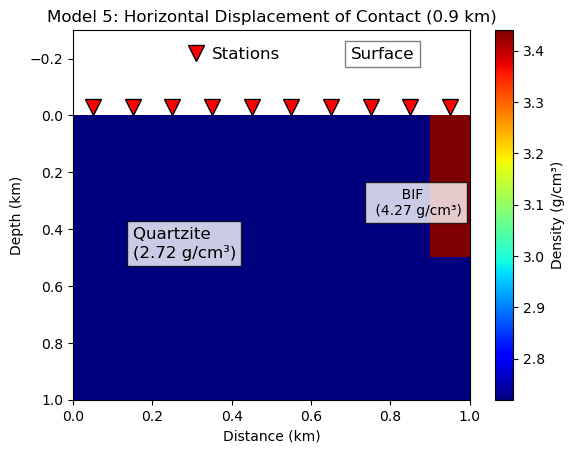

In [34]:
# 10x10 density grid
densidades = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0]*20,
    [0.0]*20,
    [0.0]*20,
    [0.0]*20,
    [0.0]*20
])

# Initial density model for visualization (g/cm³)
densidades_iniciais1 = np.array([
    [2.72]*9 + [3.44],
    [2.72]*9 + [3.44],
    [2.72]*9 + [3.44],
    [2.72]*9 + [3.44],
    [2.72]*9 + [3.44],
    [2.72]*10,
    [2.72]*10,
    [2.72]*10,
    [2.72]*10,
    [2.72]*10
])

# Conversion to kg/m³ × 10^3 for calculation
densidades = densidades * (10**12)

##### PLOTTING THE MODEL

# Plot the 2D density model
plt.imshow(densidades_iniciais1, extent=[0, 1, 1, 0], aspect='auto', cmap='jet')
plt.ylim((1, -0.3))  # Flip y-axis for depth

# Add markers for observation stations
vecxx = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
vecyy = np.zeros_like(vecxx) - 0.03
plt.plot(vecxx, vecyy, "v", markersize=12, color='red', markeredgecolor='black')

# Annotate elements on the plot
plt.text(0.7, -0.2, 'Surface', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.35, -0.2, 'Stations', fontsize=12)
plt.plot(0.31, -0.22, "v", markersize=11, color='red', markeredgecolor='black')
plt.text(0.15, 0.5, 'Quartzite \n(2.72 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.75, 0.35, '       BIF \n (4.27 g/cm³)', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Add colorbar and axis labels
plt.colorbar(label='Density (g/cm³)')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Model 5: Horizontal Displacement of Contact (0.9 km)')

# Save and show the figure
# plt.savefig("HDC-5.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)
plt.show()


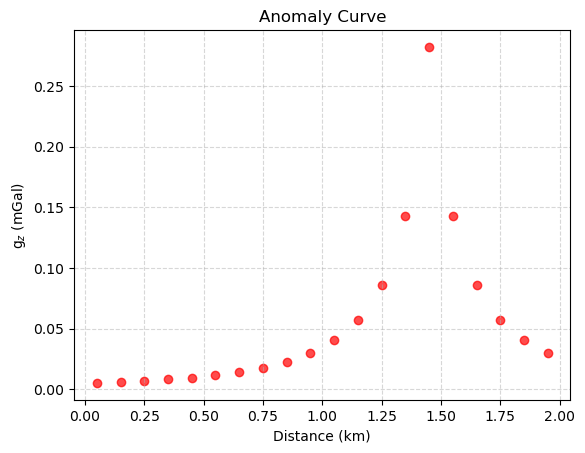

In [35]:
curva_final10 = curva_gv(densidades, vecx, xq, z1, z2, t)
curva_final10

# PLOT THE GRAPH

# Creates a scatter plot for the calculated gravity anomaly
# plt.scatter(vecx, verificar,  color='dodgerblue', marker='o', alpha=0.7)
plt.scatter(vecx, curva_final10, color='red', marker='o', alpha=0.7)

# Add labels to axes and a title to the plot
plt.xlabel('Distance (km)')
plt.ylabel('g$_z$ (mGal)')
plt.title('Anomaly Curve')

# Add gridlines to the background of the plot
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: Set axis limits if necessary
# plt.xlim(-0.25, 1.2)  # x-axis range
# plt.ylim(-0.5, 1)     # y-axis range

# Optional: Add text annotation
# plt.text(-10, 14, 'Noise: 6%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Optional: Display legend
# plt.legend(loc='upper center')

# Show the plot
plt.show()


#### All curves

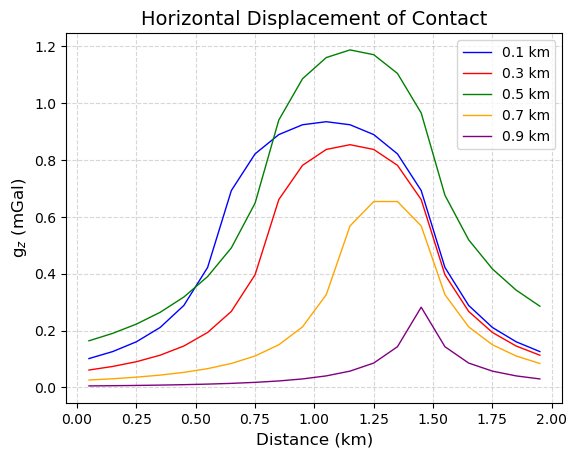

<Figure size 1000x600 with 0 Axes>

In [36]:
# Create line plots for the calculated anomaly curves
plt.plot(vecx, curva_final6, color='blue', linewidth=1, label='0.1 km')
plt.plot(vecx, curva_final7, color='red', linewidth=1, label='0.3 km')
plt.plot(vecx, curva_final8, color='green', linewidth=1, label='0.5 km')
plt.plot(vecx, curva_final9, color='orange', linewidth=1, label='0.7 km')
plt.plot(vecx, curva_final10, color='purple', linewidth=1, label='0.9 km')

# Add labels to the axes and a title to the plot
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('g$_z$ (mGal)', fontsize=12)
plt.title('Horizontal Displacement of Contact', fontsize=14)

# Add grid lines to the background
plt.grid(True, linestyle='--', alpha=0.5)

# Configure and add the legend to the plot
plt.legend(loc='upper right', fontsize=10)

# Set font size for the axis tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Save the figure
# plt.savefig("Displacement_contact.png", facecolor='w', bbox_inches="tight", transparent=True, dpi=300)

# Set the figure size
plt.figure(figsize=(10, 6))

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### Vertical Displacement of Contact

#### Model 1 (0.1 km)

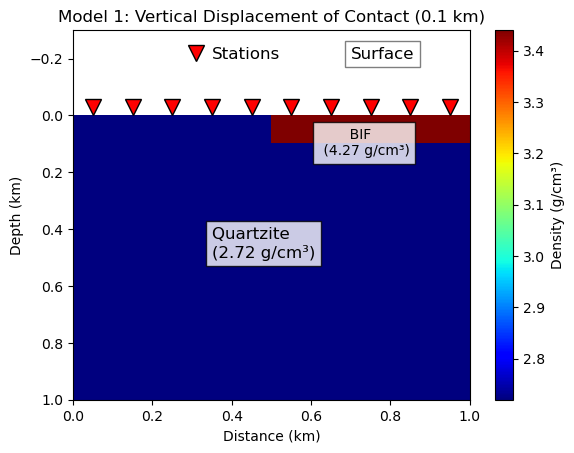

In [37]:
# 10x10 

densidades = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
])

densidades_iniciais1 = np.array([
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72]
])

# Density references (g/cm³)
# Clay - 2.21
# Limestone - 2.55
# Sandstone - 2.00
# Conglomerate - 2.50
# Metamorphic - 2.74

densidades = densidades * 1e12  # Convert to kg/m³ if necessary

# ----- PLOTTING THE MODEL -----

# Plot the 2D model of density values
plt.imshow(densidades_iniciais1, extent=[0, 1, 1, 0], aspect='auto', cmap='jet')
plt.ylim((1, -0.3))

# Add inverted triangle markers for stations
vecxx = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])
vecyy = np.zeros_like(vecxx) - 0.03
plt.plot(vecxx, vecyy, "v", markersize=12, color='red', markeredgecolor='black')

# Add labels
plt.text(0.7, -0.2, 'Surface', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.35, -0.2, 'Stations', fontsize=12)
plt.plot(0.31, -0.22, "v", markersize=11, color='red', markeredgecolor='black')
plt.text(0.35, 0.5, 'Quartzite \n(2.72 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.62, 0.14, '       BIF \n (4.27 g/cm³)', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Colorbar and axis labels
plt.colorbar(label='Density (g/cm³)')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Model 1: Vertical Displacement of Contact (0.1 km)')

# Save or display the plot
# plt.savefig("VDC-1.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)
plt.show()


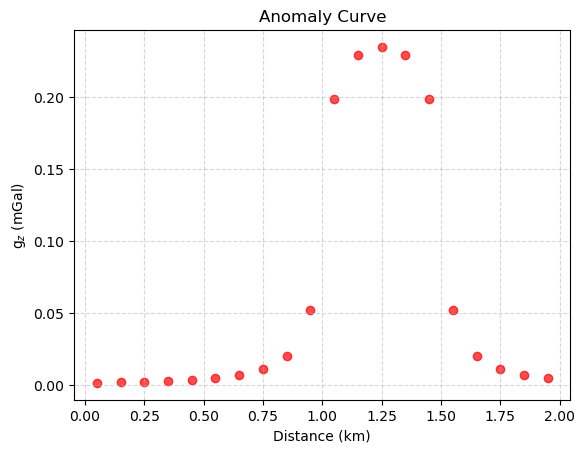

In [38]:
curva_final11 = curva_gv(densidades, vecx, xq, z1, z2, t)
curva_final11

# PLOT THE GRAPH

# Create a scatter plot for the modeled data
# plt.scatter(vecx, verificar, color='dodgerblue', marker='o', alpha=0.7)
plt.scatter(vecx, curva_final11, color='red', marker='o', alpha=0.7)

# Add axis labels and a title to the plot
plt.xlabel('Distance (km)')
plt.ylabel('g$_z$ (mGal)')
plt.title('Anomaly Curve')

# Add a background grid to the plot
plt.grid(True, linestyle='--', alpha=0.5)

# Optional axis limits
# plt.xlim(-0.25, 1.2)  # x-axis range
# plt.ylim(-0.5, 1)     # y-axis range

# Optional annotation
# plt.text(-10, 14, 'Noise: 6%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Optional legend
# plt.legend(loc='upper center')

# Display the plot
plt.show()


#### Model 2 (0.3 km)

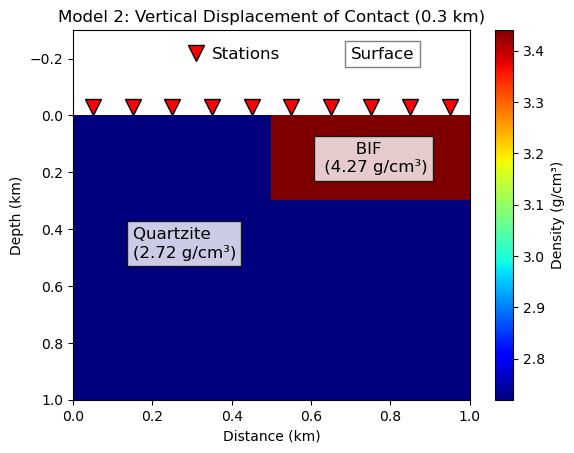

In [39]:
# 10x10 density grid

densidades = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
])

densidades_iniciais1 = np.array([
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 3.44, 3.44, 3.44, 3.44, 3.44],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72],
    [2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72, 2.72]
])

# Convert densities to kg/m³
densidades = densidades * (10**12)

# PLOTTING THE MODEL

plt.imshow(densidades_iniciais1, extent=[0, 1, 1, 0], aspect='auto', cmap='jet')
plt.ylim((1, -0.3))  # Reverse Y-axis

# Add station markers
vecxx = np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])
vecyy = np.zeros_like(vecxx) - 0.03
plt.plot(vecxx, vecyy, "v", markersize=12, color='red', markeredgecolor='black')

# Add annotations
plt.text(0.7, -0.2, 'Surface', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.35, -0.2, 'Stations', fontsize=12)
plt.plot(0.31, -0.22, "v", markersize=11, color='red', markeredgecolor='black')
plt.text(0.15, 0.5, 'Quartzite \n(2.72 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.62, 0.2, '       BIF \n (4.27 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Add colorbar and labels
plt.colorbar(label='Density (g/cm³)')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Model 2: Vertical Displacement of Contact (0.3 km)')

# plt.savefig("imagens/VDC-2.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)
plt.show()


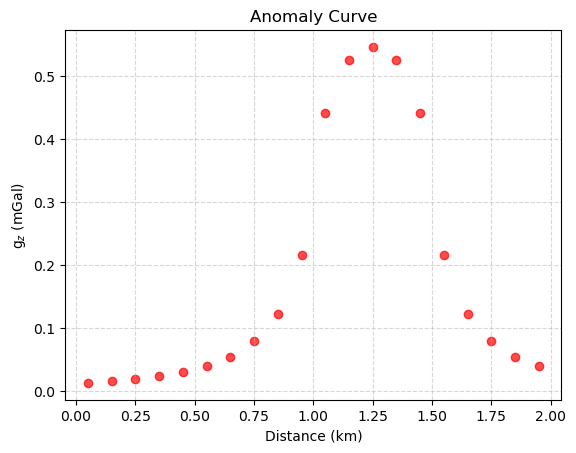

In [40]:
curva_final12 = curva_gv(densidades, vecx, xq, z1, z2, t)
curva_final12

# PLOT THE GRAPH

# Creates a scatter plot for the calculated gravity anomaly
# plt.scatter(vecx, verificar, color='dodgerblue', marker='o', alpha=0.7)  # Uncomment if you want to compare with observed data
plt.scatter(vecx, curva_final12, color='red', marker='o', alpha=0.7)

# Add axis labels and plot title
plt.xlabel('Distance (km)')
plt.ylabel('g$_z$ (mGal)')
plt.title('Anomaly Curve')

# Add grid to the background
plt.grid(True, linestyle='--', alpha=0.5)

# Optional axis limits
# plt.xlim(-0.25, 1.2)
# plt.ylim(-0.5, 1)

# Optional noise text
# plt.text(-10, 14, 'Noise: 6%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Optional legend
# plt.legend(loc='upper center')

# Display the graph
plt.show()


#### Model 3 (0.5 km)

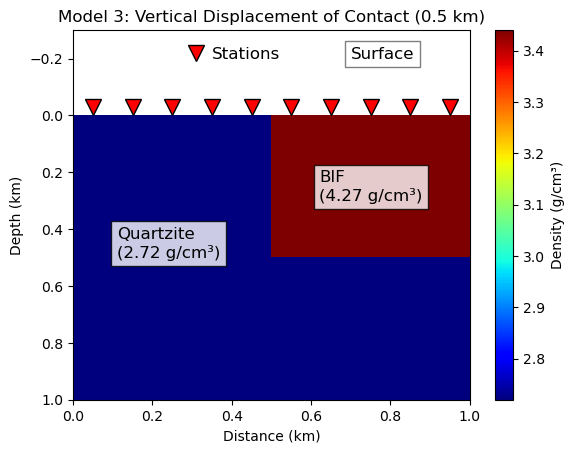

In [41]:
densities = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
])

initial_densities = np.array([
    [2.72]*5 + [3.44]*5,
    [2.72]*5 + [3.44]*5,
    [2.72]*5 + [3.44]*5,
    [2.72]*5 + [3.44]*5,
    [2.72]*5 + [3.44]*5,
    [2.72]*10,
    [2.72]*10,
    [2.72]*10,
    [2.72]*10,
    [2.72]*10
])

# Geological units (g/cm³):
# Clay = 2.21, Limestone = 2.55, Sandstone = 2.00
# Conglomerate = 2.50, Metamorphic = 2.74

densities = densities * 1e12  # Convert to kg/m³ (if needed)

### PLOTTING THE MODEL ###

plt.imshow(initial_densities, extent=[0, 1, 1, 0], aspect='auto', cmap='jet')

# Flip Y-axis
plt.ylim((1, -0.3))

# Add inverted triangle markers for stations
vecxx = np.linspace(0.05, 0.95, 10)
vecyy = np.full_like(vecxx, -0.03)
plt.plot(vecxx, vecyy, "v", markersize=12, color='red', markeredgecolor='black')

# Annotate elements
plt.text(0.7, -0.2, 'Surface', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.35, -0.2, 'Stations', fontsize=12)
plt.plot(0.31, -0.22, "v", markersize=11, color='red', markeredgecolor='black')
plt.text(0.11, 0.5, 'Quartzite\n(2.72 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.62, 0.3, 'BIF\n(4.27 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Add colorbar and labels
plt.colorbar(label='Density (g/cm³)')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Model 3: Vertical Displacement of Contact (0.5 km)')

# Save and show figure
# plt.savefig("images/VDC-3.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)
plt.show()


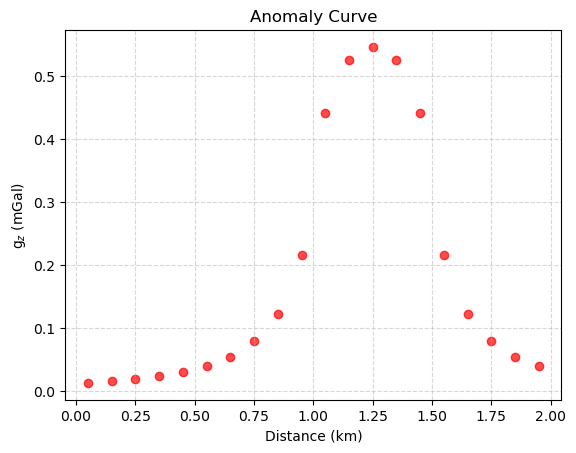

In [42]:
curva_final13 = curva_gv(densidades, vecx, xq, z1, z2, t)
curva_final13

# PLOT THE GRAPH

# Create a scatter plot for the calculated data
# plt.scatter(vecx, verificar, color='dodgerblue', marker='o', alpha=0.7)
plt.scatter(vecx, curva_final13, color='red', marker='o', alpha=0.7)

# Add axis labels and a title to the graph
plt.xlabel('Distance (km)')
plt.ylabel('g$_z$ (mGal)')
plt.title('Anomaly Curve')

# Add a grid to the background
plt.grid(True, linestyle='--', alpha=0.5)

# Set custom axis ranges if needed
# plt.xlim(-0.25, 1.2)  # X-axis range
# plt.ylim(-0.5, 1)     # Y-axis range

# Add custom annotations if desired
# plt.text(-10, 14, 'Noise: 6%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show legend if multiple curves are plotted
# plt.legend(loc='upper center')

# Display the plot
plt.show()


#### Model 4 (0.7 km)

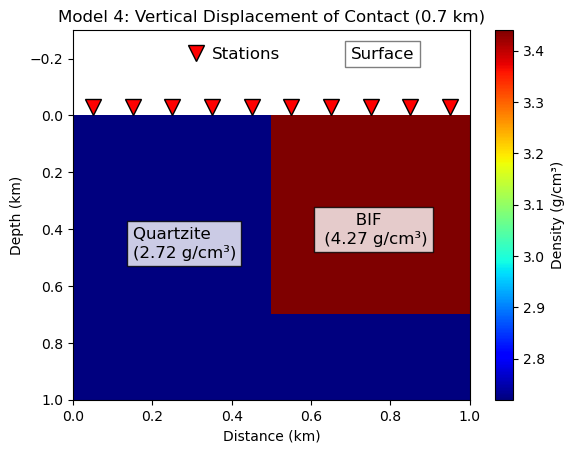

In [43]:
densidades = np.array([
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
])

# Initial model (10x10)
densidades_iniciais1 = np.array([
       [2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
       [2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
       [2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
       [2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
       [2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
       [2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
       [2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
       [2.72,2.72,2.72,2.72,2.72,2.72,2.72,2.72,2.72,2.72],
       [2.72,2.72,2.72,2.72,2.72,2.72,2.72,2.72,2.72,2.72],
       [2.72,2.72,2.72,2.72,2.72,2.72,2.72,2.72,2.72,2.72]])

# Clay - 2.21 g/cm³
# Limestone - 2.55 g/cm³
# Sandstone - 2.00 g/cm³
# Conglomerate - 2.50 g/cm³
# Metamorphic - 2.74 g/cm³

densidades = densidades * (10**12)

##### PLOTTING THE MODEL

# Plot the 2D model with different density layers
plt.imshow(densidades_iniciais1, extent=[0, 1, 1, 0], aspect='auto', cmap='jet')

# Adjust vertical axis and add labels
plt.ylim((1, -0.3))

# Add markers for stations (inverted triangles)
vecxx = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
vecyy = np.zeros_like(vecxx) - 0.03
plt.plot(vecxx, vecyy, "v", markersize=12, color='red', markeredgecolor='black')

# Annotations
plt.text(0.7, -0.2, 'Surface', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.35, -0.2, 'Stations', fontsize=12)
plt.plot(0.31, -0.22, "v", markersize=11, color='red', markeredgecolor='black')
plt.text(0.15, 0.5, 'Quartzite \n(2.72 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.62, 0.45, '       BIF \n (4.27 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Colorbar and axis labels
plt.colorbar(label='Density (g/cm³)')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Model 4: Vertical Displacement of Contact (0.7 km)')

# Save figure
# plt.savefig("VDC-4.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)

# Show plot
plt.show()


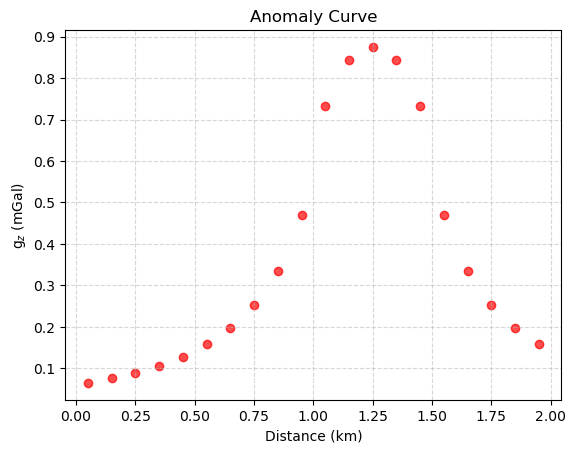

In [44]:
curva_final14 = curva_gv(densidades, vecx, xq, z1, z2, t)
curva_final14

# PLOTTING THE GRAPH

# Create a scatter plot for the calculated gravity anomaly
# plt.scatter(vecx, verificar, color='dodgerblue', marker='o', alpha=0.7)
plt.scatter(vecx, curva_final14, color='red', marker='o', alpha=0.7)

# Add labels and a title to the plot
plt.xlabel('Distance (km)')
plt.ylabel('g$_z$ (mGal)')
plt.title('Anomaly Curve')

# Add grid to the background
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: Set axis limits
# plt.xlim(-0.25, 1.2)
# plt.ylim(-0.5, 1)

# Optional: Add noise information or other annotations
# plt.text(-10, 14, 'Noise: 6%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Optional: Add legend
# plt.legend(loc='upper center')

# Show the plot
plt.show()


#### Model 5 (0.9 km)

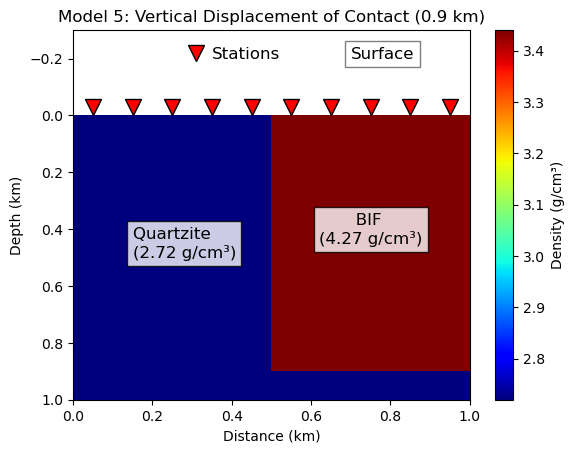

In [45]:
densidades = np.array([
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,  0.64, 0.64, 0.64, 0.64, 0.64, 0.0, 0.0, 0.0, 0.0, 0.0]
])

densidades_iniciais1 = np.array([
[2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
[2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
[2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
[2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
[2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
[2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
[2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
[2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
[2.72,2.72,2.72,2.72,2.72,3.44,3.44,3.44,3.44,3.44],
[2.72,2.72,2.72,2.72,2.72,2.72,2.72,2.72,2.72,2.72]
])

# Convert to kg/m³ (10^12 multiplier likely simulates SI units)
densidades = densidades * (10**12)

# Plotting the 2D density model
plt.imshow(densidades_iniciais1, extent=[0, 1, 1, 0], aspect='auto', cmap='jet')
plt.ylim((1, -0.3))

# Add station markers
vecxx = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
vecyy = np.zeros_like(vecxx) - 0.03
plt.plot(vecxx, vecyy, "v", markersize=12, color='red', markeredgecolor='black')

# Add labels and annotations
plt.text(0.7, -0.2, 'Surface', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.35, -0.2, 'Stations', fontsize=12)
plt.plot(0.31, -0.22, "v", markersize=11, color='red', markeredgecolor='black')
plt.text(0.15, 0.5, 'Quartzite \n(2.72 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0.62, 0.45, '       BIF \n(4.27 g/cm³)', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.colorbar(label='Density (g/cm³)')
plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Model 5: Vertical Displacement of Contact (0.9 km)')

# plt.savefig("VDC-5.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)
plt.show()


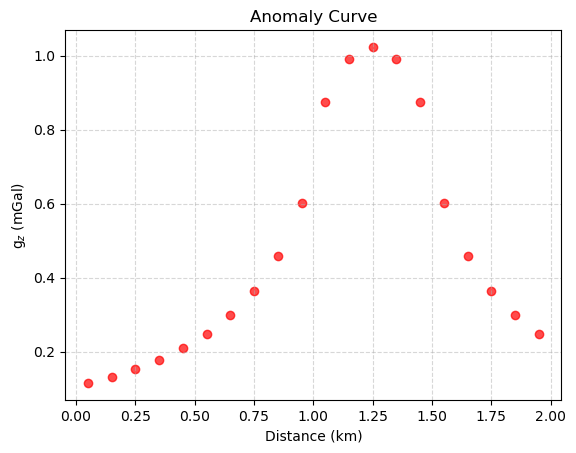

In [46]:
curva_final15 = curva_gv(densidades, vecx, xq, z1, z2, t)
curva_final15

# PLOT THE GRAPH

# Create a scatter plot for the computed data
# plt.scatter(vecx, verificar, color='dodgerblue', marker='o', alpha=0.7)
plt.scatter(vecx, curva_final15, color='red', marker='o', alpha=0.7)

# Add axis labels and a title to the plot
plt.xlabel('Distance (km)')
plt.ylabel('g$_z$ (mGal)')
plt.title('Anomaly Curve')

# Add a grid to the background
plt.grid(True, linestyle='--', alpha=0.5)

# Define the desired axis ranges
# plt.xlim(-0.25, 1.2)  # X-axis range
# plt.ylim(-0.5, 1)     # Y-axis range

# Optional noise label
# plt.text(-10, 14, 'Noise: 6%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Display a legend if needed
# plt.legend(loc='upper center')

# Show the plot
plt.show()


#### All curves

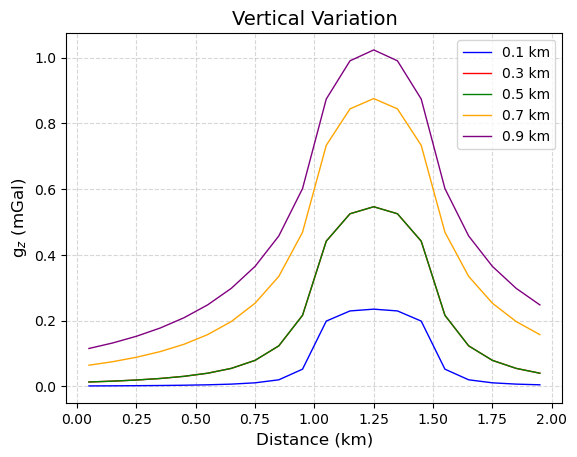

<Figure size 1000x600 with 0 Axes>

In [47]:
# PLOT THE GRAPH

# Create line plots for the computed data
plt.plot(vecx, curva_final11, color='blue', linewidth=1, label='0.1 km')
plt.plot(vecx, curva_final12, color='red', linewidth=1, label='0.3 km')
plt.plot(vecx, curva_final13, color='green', linewidth=1, label='0.5 km')
plt.plot(vecx, curva_final14, color='orange', linewidth=1, label='0.7 km')
plt.plot(vecx, curva_final15, color='purple', linewidth=1, label='0.9 km')

# Add axis labels and a title to the plot
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('g$_z$ (mGal)', fontsize=12)
plt.title('Vertical Variation', fontsize=14)

# Add a background grid to the plot
plt.grid(True, linestyle='--', alpha=0.5)

# Define the legend style and add it to the plot
plt.legend(loc='upper right', fontsize=10)

# Set font size for the axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Save the figure
# plt.savefig("Vertical_variation.png", facecolor='w', bbox_inches="tight", transparent=False, dpi=300)

# Set the figure size
plt.figure(figsize=(10, 6))

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()
